In [1]:
import numpy as np 
import pandas as pd 


In [2]:
#importing dataset
from data import get_proteomics
X, y, gene_family = get_proteomics()

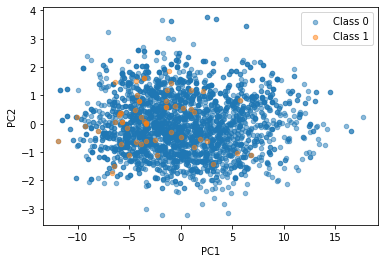

In [3]:
from data_analytics import pca_plot
fig = pca_plot(X, y)

In [4]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
cv = KFold(n_splits=3)
scv = StratifiedKFold(n_splits=3)

In [5]:
train_idx, test_idx = next(cv.split(X, y))

In [6]:
from models import Models
X_train = pd.DataFrame(X[train_idx])
y_train = pd.DataFrame(y[train_idx])
X_test = pd.DataFrame(X[test_idx])
y_test = pd.DataFrame(y[test_idx])


[MLENS] backend: threading


In [7]:
classifiers = Models(X_train, y_train, X_test, y_test)

In [8]:
classifiers.SVM_Classifier()

SVM accuracy is :0.9781529294935452


In [9]:
classifiers.ExtraTress_Classifier(300)

ExtraTreesClassifier accuracy is :0.9781529294935452


In [13]:
classifiers.RF_Classifier(300)

random forest accuracy is :0.9781529294935452


In [14]:
classifiers.LR_Classifier()

LogisticRegression accuracy is :0.9771598808341608


In [15]:
from sklearn.ensemble import RandomForestClassifier
pred = classifiers.mlen_combined_model(RandomForestClassifier(n_estimators=300))

                                      score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier      0       0.98     0.00  0.62  0.00  0.04  0.00
layer-1  baggingclassifier       0       0.98     0.00  9.91  0.00  0.13  0.00
layer-1  decisiontreeclassifier  0       0.97     0.00  0.06  0.00  0.00  0.00
layer-1  extratreesclassifier    0       0.98     0.00  0.84  0.00  0.14  0.00
layer-1  gaussiannb              0       0.64     0.00  0.02  0.00  0.00  0.00
layer-1  kneighborsclassifier    0       0.98     0.00  0.01  0.00  0.30  0.00
layer-1  logisticregression      0       0.98     0.00  0.02  0.00  0.00  0.00
layer-1  randomforestclassifier  0       0.98     0.00  1.92  0.00  0.13  0.00
layer-1  svc                     0       0.98     0.00  0.08  0.00  0.01  0.00
layer-1  xgbclassifier           0       0.98     0.00  0.55  0.00  0.00  0.00
layer-2  adaboostclassifier      0       0.98     0.00  0.35  0.01  0.10  0.00
layer-2  baggingclassifier       0       0.98     0.

In [16]:
classifiers.final_report(pred)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       985
           1       0.00      0.00      0.00        22

    accuracy                           0.98      1007
   macro avg       0.49      0.50      0.49      1007
weighted avg       0.96      0.98      0.97      1007

